# Supervised ML: Company Bankruptcy Prediction

In this project, I will complete a classification task. The dataset I will look at is [the Company Bankruptcy Prediction dataset from Kaggle](https://www.kaggle.com/fedesoriano/company-bankruptcy-prediction), which is a Bankruptcy data from the Taiwan Economic Journal for the years 1999–2009.


My goal is to train a **random forest** model to predict whether a business will go bankrupt. I will use **PCA** to reduce the dimension of the dataset. I will use **cross-validation** to choose the best hyperparameters for the random forest model and then fit a model with the "best" set of hyperparameters.

In [1]:
# import block
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

from coding_3 import *

## 1. The Dataset

In [2]:
# import data
data = np.genfromtxt("data.csv", delimiter=',', skip_header=1)
data_pd = pd.read_csv("data.csv", sep=",")

print(data.shape)
data_pd.head()

(6819, 96)


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


The dataset has 6819 rows and 96 columns. Each row represents a company. The first column `Bankrupt?` is the target I want to predict, and I will use the other 95 numerical features to train the mode. First I will need to standardize the numerical variables.

In [3]:
# standardize the data (except for the first column)
target = data_pd.iloc[:, 0]
features = data_pd.iloc[:, 1:]
features_std = preprocessing.scale(features)

print(features_std.shape)
pd.DataFrame(features_std).head()

(6819, 95)


C:\Users\15810\miniconda3\envs\csc294\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


,0,1,2,3,4,5,6,7,8,9,...,85,86,87,88,89,90,91,92,93,94
0,-2.217909,-2.045798,-2.400361,-0.383334,-0.382638,0.016456,-0.023516,-0.020165,-0.087479,-0.031281,...,-2.254317,-0.049491,-0.084274,-0.383465,-0.861611,0.680171,-0.060031,-0.098978,0.0,-0.622067
1,-0.673828,-0.311068,-0.598450,0.135068,0.136307,0.014671,0.014799,0.015966,-0.005957,0.009823,...,-0.309033,-0.049491,-0.021388,0.135253,-0.029804,0.240685,15.129816,0.364559,0.0,-0.535573
2,-1.303672,-0.908420,-1.319910,-0.383759,-0.388177,0.007858,-0.061111,-0.051183,-0.142238,-0.086566,...,-0.820510,-0.049491,-0.005984,-0.383698,-0.249820,0.679247,-0.062961,-0.125015,0.0,-0.621960
3,-1.735886,-1.636209,-1.556340,-1.441418,-1.441832,-0.004257,-0.017313,-0.008676,-0.024491,-0.011077,...,-1.691222,-0.049491,-0.080226,-1.441526,-0.392864,0.093765,-0.053903,-0.052562,0.0,-0.471826
4,-0.661778,-0.307745,-0.508050,-0.541238,-0.540708,0.016758,0.013703,0.016186,-0.013254,0.013300,...,-0.316008,-0.049491,-0.032052,-0.541255,-0.029564,-0.128014,-0.178037,0.776395,0.0,-0.241715


I will split the dataset into two sets: the train/test dataset and the validation dataset. I will use cross-validation and fit models on the train/test dataset to decide the set of hyperparameters I should use, fit a model with the best set of hyperparameters on the train/test dataset, and test the model on the validation dataset. The validation dataset contains 15% of all data points.

In [4]:
# split the dataset into validation and train/test sets
# the validation dataset contains 15% of all data points

all_data = np.hstack([pd.DataFrame(target), features_std])
val, data = split_val_data(all_data, 15)

val_feature = val[:, 1:]
val_target = val[:, 0]

data_feature = data[:, 1:]
data_target = data[:, 0]

In [5]:
print(data_target.shape)
print()
print(data_feature.shape)

(5797,)

(5797, 95)


## 2. Dimension Reduction with PCA

The data has 6819 rows. Except for the first column `Bankrupt?` (boolean), there are 95 numerical features that I can use to predict `Bankrupt?`. 95 features are a lot and may slow down the calculation significantly. Therefore, I will first use PCA to reduce the dimension of this dataset.

In [6]:
# implement PCA
# In order to visualize the data, I will reduce the dimension to 3
pca = PCA(n_components=3)
features_lowdim = pca.fit_transform(features_std)
features_lowdim_pd = pd.DataFrame(data=features_lowdim, columns=['pc1', 'pc2', 'pc3'])

print(features_lowdim_pd.shape)
features_lowdim_pd.head()

(6819, 3)


,pc1,pc2,pc3
0,-7.338295,0.373334,0.309975
1,-2.703713,-0.986389,2.154398
2,-4.307058,-0.404734,0.308670
3,-5.830736,-1.385627,1.302050
4,-2.343198,-0.201577,-0.802507


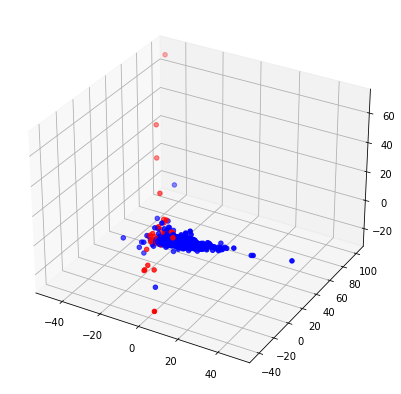

In [7]:
# visualize the data after dimension reduction
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')
ax.scatter(features_lowdim[:, 0], features_lowdim[:, 1], features_lowdim[:, 2], c=target, cmap='bwr');

In [8]:
# also split the dataset after dimension reduction into validation and train/test sets
# for later us when fitting models

reduced_all_data = np.hstack([pd.DataFrame(target), features_lowdim_pd])
reduced_val, data = split_val_data(all_data, 15)

reduced_val_feature = val[:, 1:]
reduced_val_target = val[:, 0]

reduced_feature = data[:, 1:]
reduced_target = data[:, 0]

In [9]:
print(reduced_target.shape)
print()
print(reduced_feature.shape)

(5797,)

(5797, 95)


## 3. Random Forest & Cross-Validation

Before fitting a model, I will need to decide:

* should I fit a model on the dataset before or after dimension reduction
* what hyperparameters I should use when fitting a model

In this section, I will implement 10-fold cross-validation on random forest models with different hyperparameters and input datasets. I will decide on the hyperparameters as well as input datasets.

### 3.1. Without Dimension Reduction and Change `max_features`

In [10]:
all_error_1 = random_forest_cross_val(10, data_feature, data_target, 20, 5, max_features=5)
all_error_1

0.03071790246806604

In [11]:
all_error_2 = random_forest_cross_val(10, data_feature, data_target, 20, 5, max_features=10)
all_error_2

0.03227436972065524

In [12]:
all_error_3 = random_forest_cross_val(10, data_feature, data_target, 20, 5, max_features=20)
all_error_3

0.031238100290603428

In [13]:
all_error_4 = random_forest_cross_val(10, data_feature, data_target, 20, 5, max_features=30)
all_error_4

0.031065388718928128

In [14]:
all_error_5 = random_forest_cross_val(10, data_feature, data_target, 20, 5, max_features=40)
all_error_5

0.031065388718928128

In [15]:
all_error_6 = random_forest_cross_val(10, data_feature, data_target, 20, 5, max_features=50)
all_error_6

0.030029119288876315

### 3.2. With Dimension Reduction and Change `max_depth`

In [16]:
red_error_1 = random_forest_cross_val(10, reduced_feature, reduced_target, 20, 3, 3)
red_error_1

0.03209753193395698

In [17]:
red_error_2 = random_forest_cross_val(10, reduced_feature, reduced_target, 20, 5, 3)
red_error_2

0.031238100290603428

In [18]:
red_error_3 = random_forest_cross_val(10, reduced_feature, reduced_target, 20, 7, 3)
red_error_3

0.03106332561141665

In [19]:
red_error_4 = random_forest_cross_val(10, reduced_feature, reduced_target, 20, 10, 3)
red_error_4

0.03141287496979021

In [20]:
red_error_5 = random_forest_cross_val(10, reduced_feature, reduced_target, 20, 15, 3)
red_error_5

0.031240163398114907

## 4. Tune the Best Model

Each time I run the codes, I get slightly different cross-val errors, but all cross-val errors are always very close and very small. In the last run, the smallest cross-validated error got in section 3 is 0.0300. The input dataset/hyperparameters are

* input dataset: without dimension reduction  
* n_estimators: 20  
* max_depth: 5  
* max_features: 50

In [24]:
# tune the model
rf = RandomForestClassifier(n_estimators=20, max_depth=5, max_features=50, random_state=2021)
rf.fit(data_feature, data_target)

RandomForestClassifier(max_depth=5, max_features=50, n_estimators=20,
                       random_state=2021)

In [25]:
# mean accuracy
rf.score(val_feature, val_target)

0.9667318982387475

I fit the model on the train/test dataset before dimension reduction and test the model on the validation dataset. The mean accuracy is 0.9667.